# INSURANCE DATASET ANALYSIS

-------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


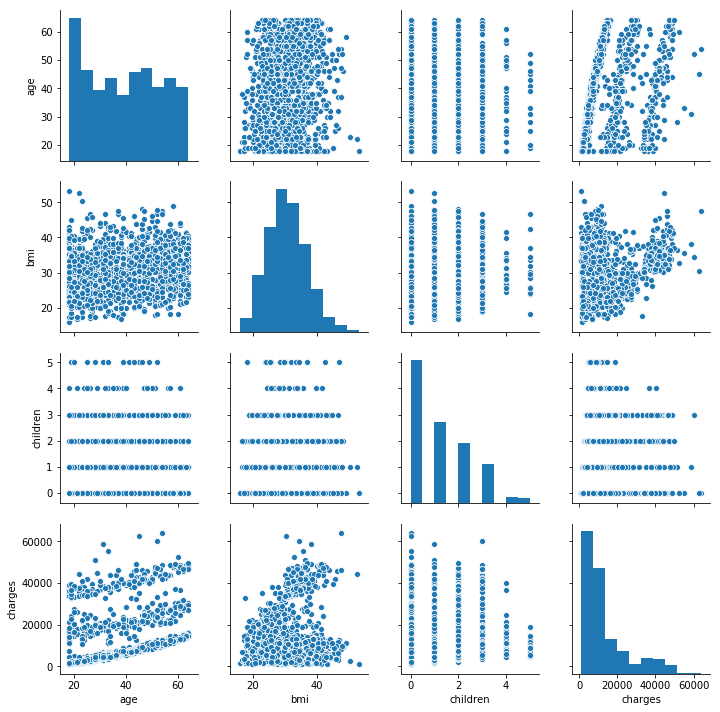

In [5]:
sns.pairplot(data)

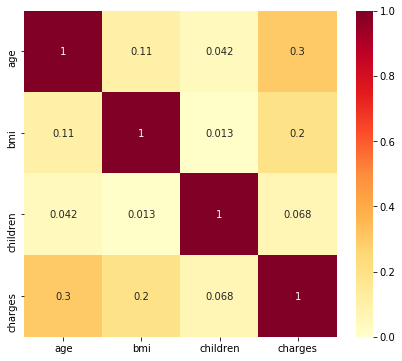

In [82]:
corr = data.corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, vmax=1.0, vmin=0.0, cmap="YlOrRd")

<b>== DATA ANALYSIS QUERIES ==</b>

Gender Counts Ratio

In [7]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

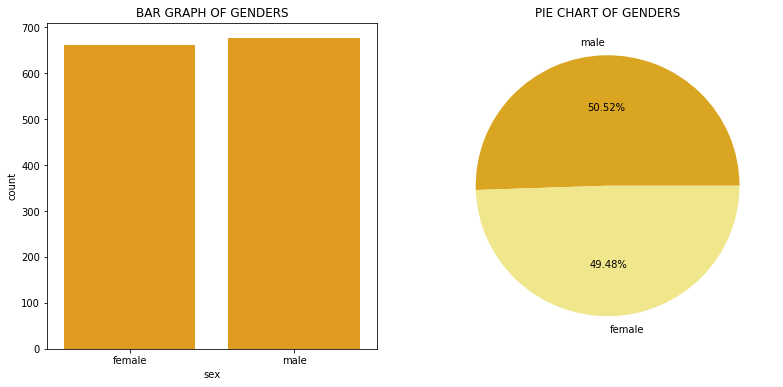

In [8]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF GENDERS")
sns.countplot(data.sex, color="orange")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF GENDERS")
plt.pie(data.sex.value_counts(), labels=data.sex.value_counts().index, autopct="%1.2f%%", colors=["goldenrod","khaki"])

plt.show()

Smokers And Non-Smokers Ratio

In [9]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

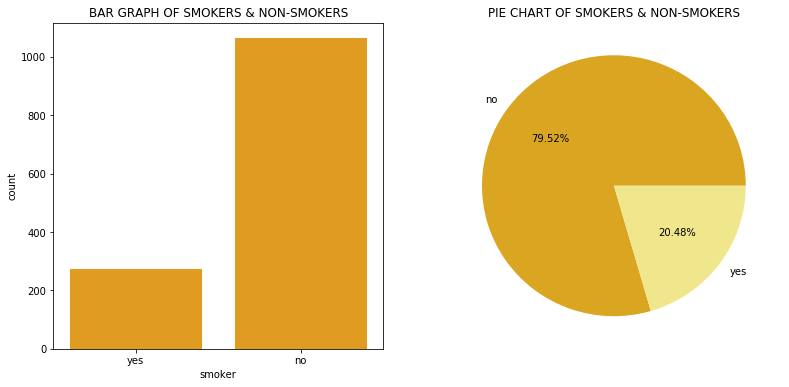

In [10]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF SMOKERS & NON-SMOKERS")
sns.countplot(data.smoker, color="orange")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF SMOKERS & NON-SMOKERS")
plt.pie(data.smoker.value_counts(), labels=data.smoker.value_counts().index, autopct="%1.2f%%", colors=["goldenrod","khaki"])

plt.show()

BMI Averages With Respect To Genders

In [63]:
round(data["bmi"].mean(),2)

30.66

In [11]:
# MALE DATA

male_data = data[data["sex"]=="male"].reset_index(drop=True)
male_data.head()

,age,sex,bmi,children,smoker,region,charges
0,18,male,33.770,1,no,southeast,1725.55230
1,28,male,33.000,3,no,southeast,4449.46200
2,33,male,22.705,0,no,northwest,21984.47061
3,32,male,28.880,0,no,northwest,3866.85520
4,37,male,29.830,2,no,northeast,6406.41070


In [12]:
male_bmi_avg = male_data["bmi"].mean()
print("Average Of BMI (Males): ",round(male_bmi_avg,2))

Average Of BMI (Males):  30.94


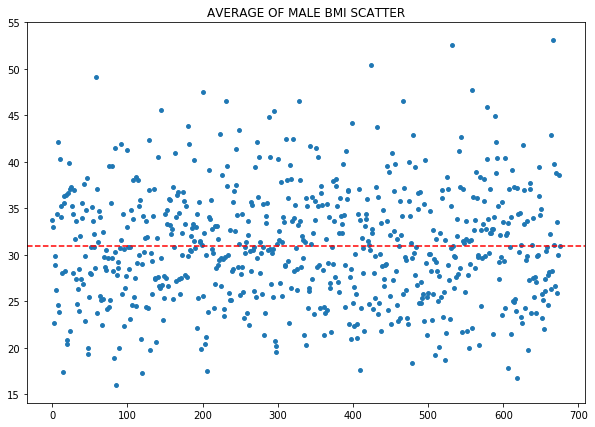

In [13]:
plt.figure(figsize=(10,7))
plt.title("AVERAGE OF MALE BMI SCATTER")
plt.scatter(male_data.index,male_data.bmi, s=15)
plt.axhline(male_bmi_avg, color='r', linestyle='dashed')

In [14]:
# FEMALE DATA

female_data = data[data["sex"]=="female"].reset_index(drop=True)
female_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
1,31,female,25.74,0,no,southeast,3756.62160
2,46,female,33.44,1,no,southeast,8240.58960
3,37,female,27.74,3,no,northwest,7281.50560
4,60,female,25.84,0,no,northwest,28923.13692


In [15]:
female_bmi_avg = female_data["bmi"].mean()
print("Average Of BMI (Females): ",round(female_bmi_avg,2))

Average Of BMI (Females):  30.38


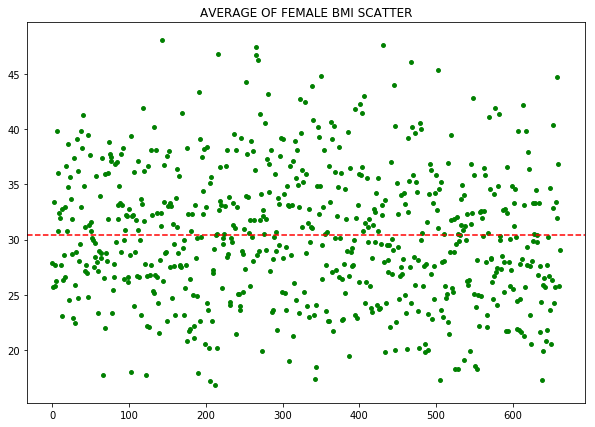

In [16]:
plt.figure(figsize=(10,7))
plt.title("AVERAGE OF FEMALE BMI SCATTER")
plt.scatter(female_data.index,female_data.bmi, s=15, c="green")
plt.axhline(female_bmi_avg, color='r', linestyle='dashed')

Male And Female Smokers Ratio

In [17]:
yes_smokers = data[data["smoker"]=="yes"].reset_index(drop=True)
yes_smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,62,female,26.29,0,yes,southeast,27808.7251
2,27,male,42.13,0,yes,southeast,39611.7577
3,30,male,35.30,0,yes,southwest,36837.4670
4,34,female,31.92,1,yes,northeast,37701.8768


In [18]:
yes_smokers.sex.value_counts()

male      159
female    115
Name: sex, dtype: int64

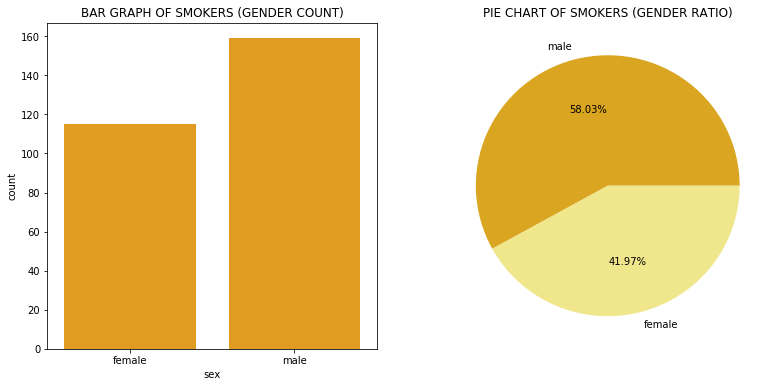

In [19]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF SMOKERS (GENDER COUNT)")
sns.countplot(yes_smokers.sex, color="orange")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF SMOKERS (GENDER RATIO)")
plt.pie(yes_smokers.sex.value_counts(), labels=yes_smokers.sex.value_counts().index, autopct="%1.2f%%", colors=["goldenrod","khaki"])

plt.show()

Counts Of Males Having Charges Greater Than Mean Charges

In [20]:
avg_charges = data["charges"].mean()
print("Average Of Charges: ",avg_charges)

Average Of Charges:  13270.422265141257


In [21]:
m_above_avg_char = male_data["charges"][male_data["charges"] > avg_charges]

In [22]:
print("There are ",len(m_above_avg_char)," Males having Charges greater than Average Charges")

There are  221  Males having Charges greater than Average Charges


In [23]:
m_above_avg_char = m_above_avg_char.reset_index(drop=True)

In [24]:
f_above_avg_char = female_data["charges"][female_data["charges"] > avg_charges]

In [25]:
print("There are ",len(f_above_avg_char)," Females having Charges greater than Average Charges")

There are  199  Females having Charges greater than Average Charges


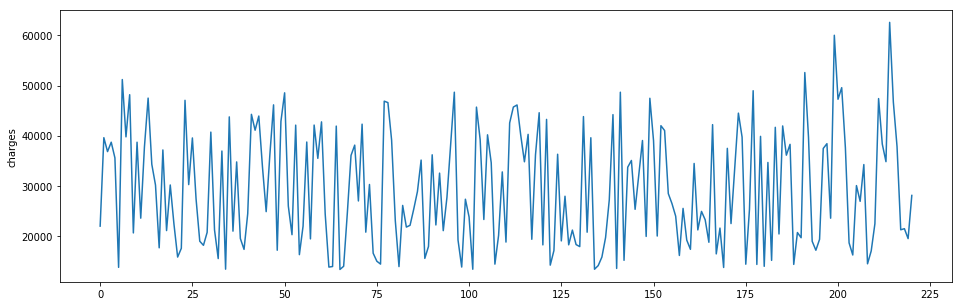

In [26]:
plt.figure(figsize=(16,5))
plt.xticks(np.arange(0,226,25))
sns.lineplot(m_above_avg_char.index, m_above_avg_char)

Region Ratio Of Genders

In [27]:
print("==MALES AND THEIR REGIONS==")
male_data.region.value_counts()

==MALES AND THEIR REGIONS==


southeast    189
northeast    163
southwest    163
northwest    161
Name: region, dtype: int64

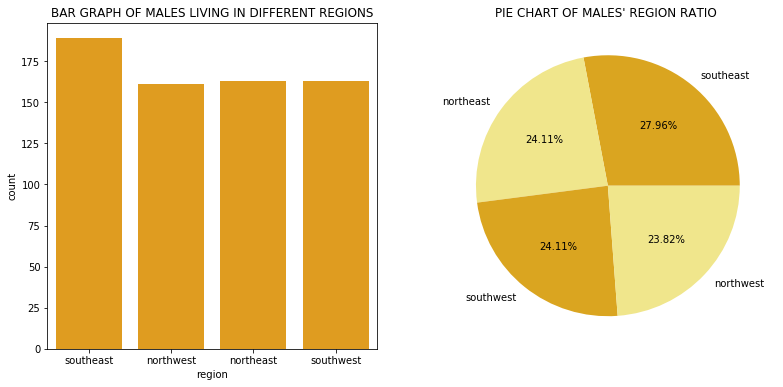

In [28]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF MALES LIVING IN DIFFERENT REGIONS")
sns.countplot(male_data.region, color="orange")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF MALES' REGION RATIO ")
plt.pie(male_data.region.value_counts(), labels=male_data.region.value_counts().index, autopct="%1.2f%%", colors=["goldenrod","khaki"])

plt.show()

In [29]:
print("==FEMALES AND THEIR REGIONS==")
female_data.region.value_counts()

==FEMALES AND THEIR REGIONS==


southeast    175
northwest    164
southwest    162
northeast    161
Name: region, dtype: int64

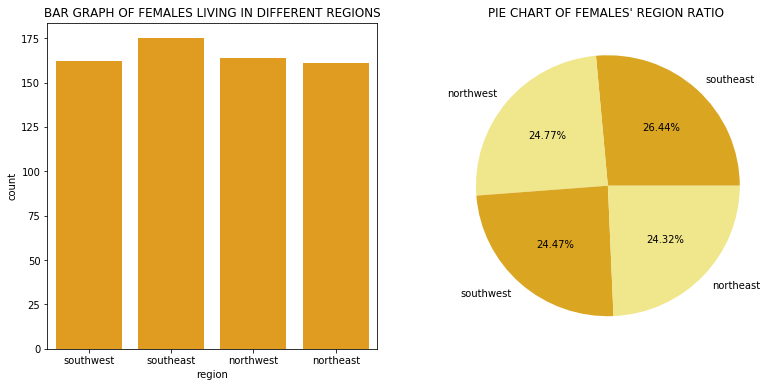

In [30]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF FEMALES LIVING IN DIFFERENT REGIONS")
sns.countplot(female_data.region, color="orange")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF FEMALES' REGION RATIO ")
plt.pie(female_data.region.value_counts(), labels=female_data.region.value_counts().index, autopct="%1.2f%%", colors=["goldenrod","khaki"])

plt.show()

Genders Ratio Of Ages Greater Than 40

In [31]:
ages_above_40 = data[data["age"]>40].reset_index(drop=True)
ages_above_40.head()

,age,sex,bmi,children,smoker,region,charges
0,46,female,33.44,1,no,southeast,8240.58960
1,60,female,25.84,0,no,northwest,28923.13692
2,62,female,26.29,0,yes,southeast,27808.72510
3,56,female,39.82,0,no,southeast,11090.71780
4,52,female,30.78,1,no,northeast,10797.33620


In [32]:
print("==GENDER COUNTS HAVING AGE MORE THAN FORTY==")
ages_above_40.sex.value_counts()

==GENDER COUNTS HAVING AGE MORE THAN FORTY==


female    321
male      316
Name: sex, dtype: int64

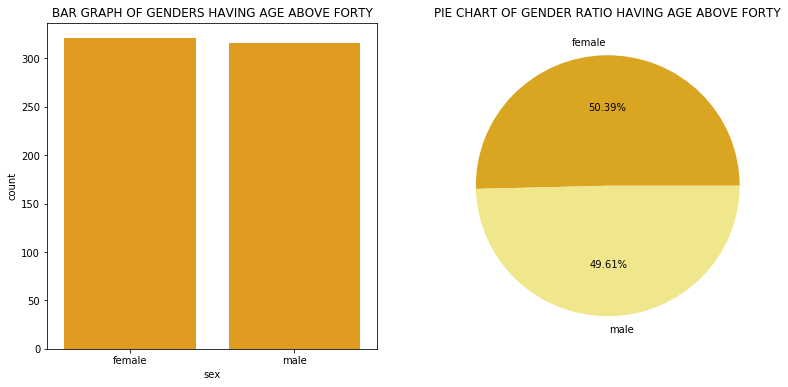

In [33]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF GENDERS HAVING AGE ABOVE FORTY")
sns.countplot(ages_above_40.sex, color="orange")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF GENDER RATIO HAVING AGE ABOVE FORTY")
plt.pie(ages_above_40.sex.value_counts(), labels=ages_above_40.sex.value_counts().index, autopct="%1.2f%%", colors=["goldenrod","khaki"])

plt.show()

In [34]:
# Males Percentage Having Age Over 40 W.r.t Male Data

round((len(ages_above_40[ages_above_40["sex"]=="male"]) / len(male_data))*100,2)

46.75

In [35]:
# Females Percentage Having Age Over 40 W.r.t Female Data

round((len(ages_above_40[ages_above_40["sex"]=="female"]) / len(female_data))*100,2)

48.49

Ratio Of Regions Having Smokers

In [36]:
print("==SMOKERS COUNTS PER REGION==")
yes_smokers.region.value_counts()

==SMOKERS COUNTS PER REGION==


southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64

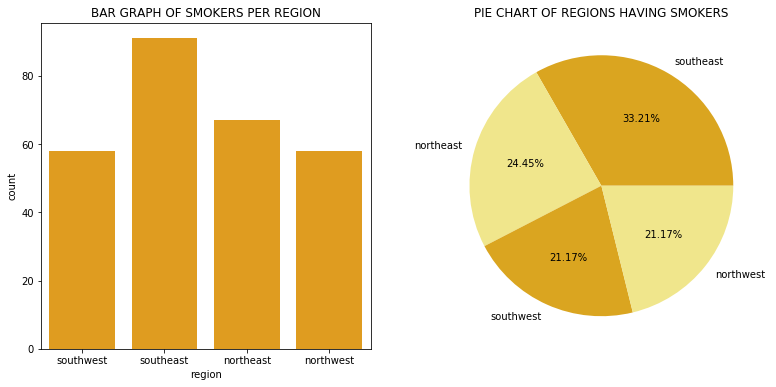

In [37]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF SMOKERS PER REGION")
sns.countplot(yes_smokers.region, color="orange")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF REGIONS HAVING SMOKERS")
plt.pie(yes_smokers.region.value_counts(), labels=yes_smokers.region.value_counts().index, autopct="%1.2f%%", colors=["goldenrod","khaki"])

plt.show()

Genders Ratio Having Three Children

In [38]:
three_child = data[data["children"]==3].reset_index(drop=True)
three_child.head()

,age,sex,bmi,children,smoker,region,charges
0,28,male,33.000,3,no,southeast,4449.46200
1,37,female,27.740,3,no,northwest,7281.50560
2,59,female,27.720,3,no,southeast,14001.13380
3,62,female,32.965,3,no,northwest,15612.19335
4,40,female,28.690,3,no,northwest,8059.67910


In [39]:
print("==GENDER COUNTS HAVING THREE CHILDREN==")
three_child.sex.value_counts()

==GENDER COUNTS HAVING THREE CHILDREN==


male      80
female    77
Name: sex, dtype: int64

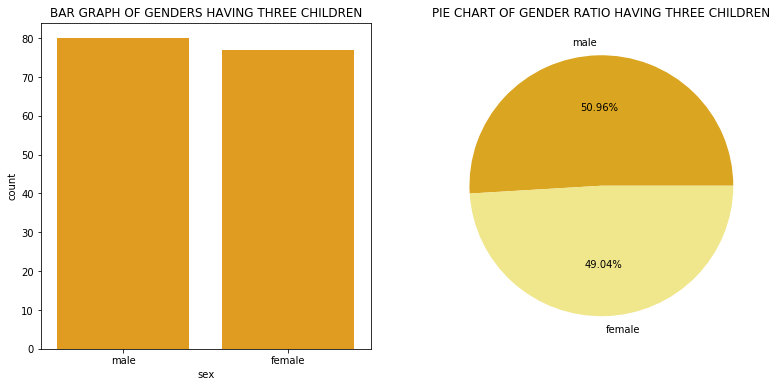

In [40]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF GENDERS HAVING THREE CHILDREN")
sns.countplot(three_child.sex, color="orange")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF GENDER RATIO HAVING THREE CHILDREN")
plt.pie(three_child.sex.value_counts(), labels=three_child.sex.value_counts().index, autopct="%1.2f%%", colors=["goldenrod","khaki"])

plt.show()

Mean Of Ages With Respect To Genders

In [41]:
# MALE

male_age_mean = male_data["age"].mean()
print("Mean Of Ages (Males): ",round(male_age_mean,2))

Mean Of Ages (Males):  38.92


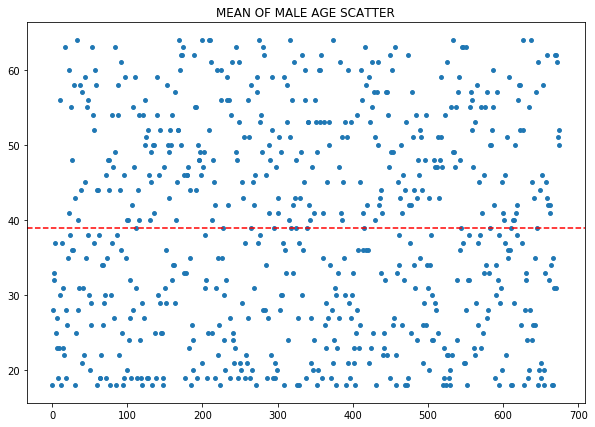

In [42]:
plt.figure(figsize=(10,7))
plt.title("MEAN OF MALE AGE SCATTER")
plt.scatter(male_data.index,male_data.age, s=15)
plt.axhline(male_age_mean, color='r', linestyle='dashed')

In [43]:
# FEMALE

female_age_mean = female_data["age"].mean()
print("Mean Of Ages (Males): ",round(female_age_mean,2))

Mean Of Ages (Males):  39.5


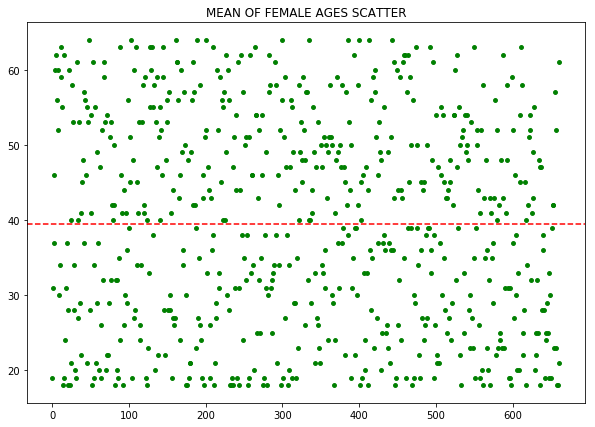

In [44]:
plt.figure(figsize=(10,7))
plt.title("MEAN OF FEMALE AGES SCATTER")
plt.scatter(female_data.index,female_data.age, s=15, c="green")
plt.axhline(female_age_mean, color='r', linestyle='dashed')

Distribution And Skewness Of Ages

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


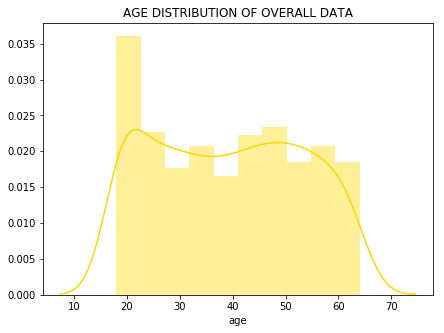

In [45]:
# OverAll

plt.figure(figsize=(7,5))
sns.distplot(data["age"], bins=10, color="gold")
plt.title("AGE DISTRIBUTION OF OVERALL DATA")
plt.show()

In [46]:
# Overall Age Skewness

round(data["age"].skew(),3)

0.056

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


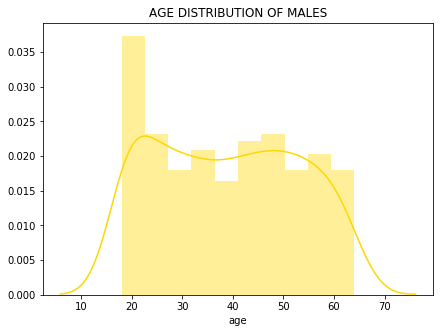

In [47]:
# Male Age Distribution

plt.figure(figsize=(7,5))
sns.distplot(male_data["age"], bins=10, color="gold")
plt.title("AGE DISTRIBUTION OF MALES")
plt.show()

In [48]:
# Male Ages Skewness

round(male_data["age"].skew(),3)

0.082

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


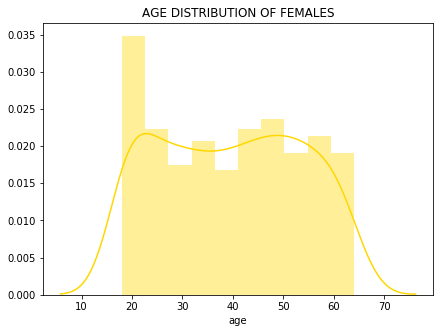

In [49]:
# Female Age Distribution

plt.figure(figsize=(7,5))
sns.distplot(female_data["age"], bins=10, color="gold")
plt.title("AGE DISTRIBUTION OF FEMALES")
plt.show()

In [50]:
# Female Ages Skewness

round(female_data["age"].skew(),3)

0.029

Distribution And Skewness Of Charges

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


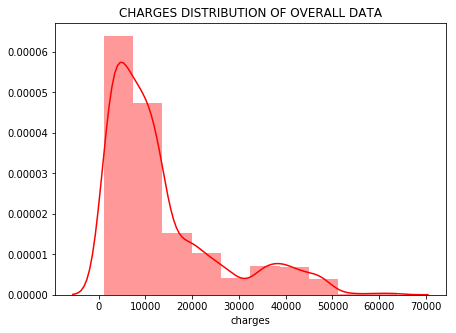

In [66]:
# OverAll

plt.figure(figsize=(7,5))
sns.distplot(data["charges"], bins=10, color="red")
plt.title("CHARGES DISTRIBUTION OF OVERALL DATA")
plt.show()

In [52]:
# Overall Charges Skewness

round(data["charges"].skew(),3)

1.516

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


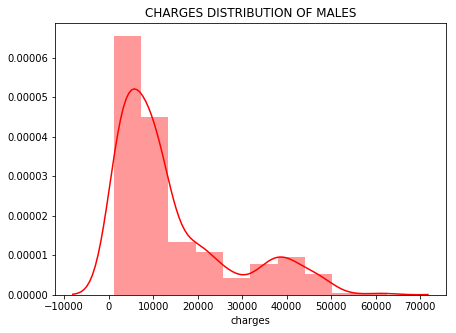

In [67]:
# Male Charges Distribution

plt.figure(figsize=(7,5))
sns.distplot(male_data["charges"], bins=10, color="red")
plt.title("CHARGES DISTRIBUTION OF MALES")
plt.show()

In [54]:
# Male Charges Skewness

round(male_data["charges"].skew(),3)

1.336

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


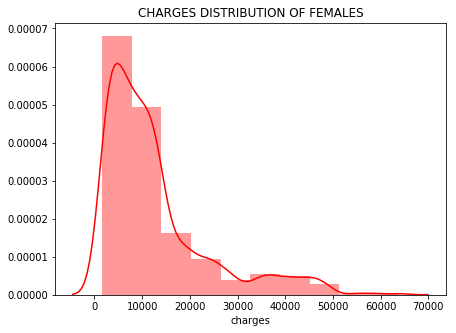

In [68]:
# Female Charges Distribution

plt.figure(figsize=(7,5))
sns.distplot(female_data["charges"], bins=10, color="red")
plt.title("CHARGES DISTRIBUTION OF FEMALES")
plt.show()

In [56]:
# Female Charges Skewness

round(female_data["charges"].skew(),3)

1.729

---------------